In [23]:
import pandas as pd
from tensorflow import *
import numpy as np

### 2 classes: cats and dogs

In [24]:
train_ds_1, test_ds_1 = keras.utils.image_dataset_from_directory(
    r"C:\Users\Capybaras\Desktop\data3",
    validation_split=0.2, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


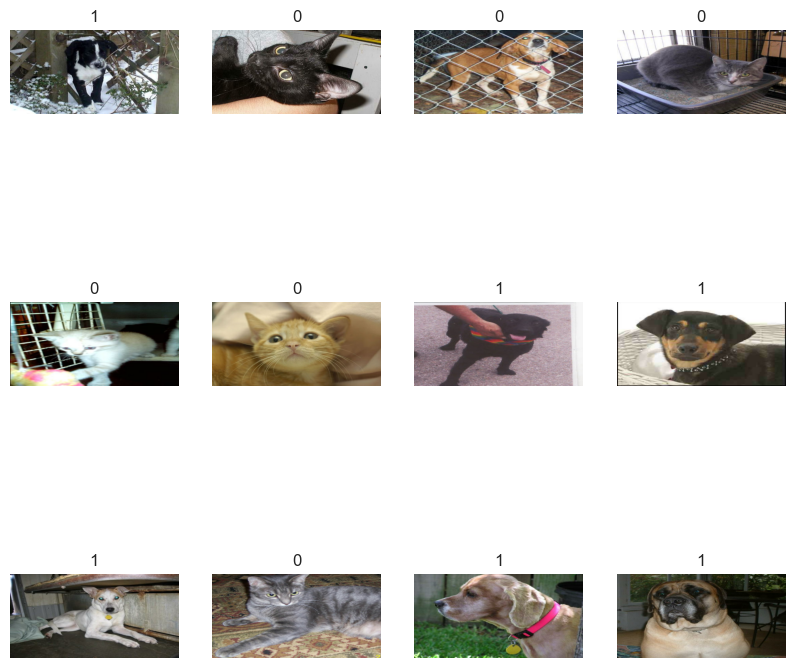

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Augmentation

In [26]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [27]:
for i in range(3):
    train_ds_1 = train_ds_1.map(
        lambda img, label: (data_augmentation(img), label)
    )

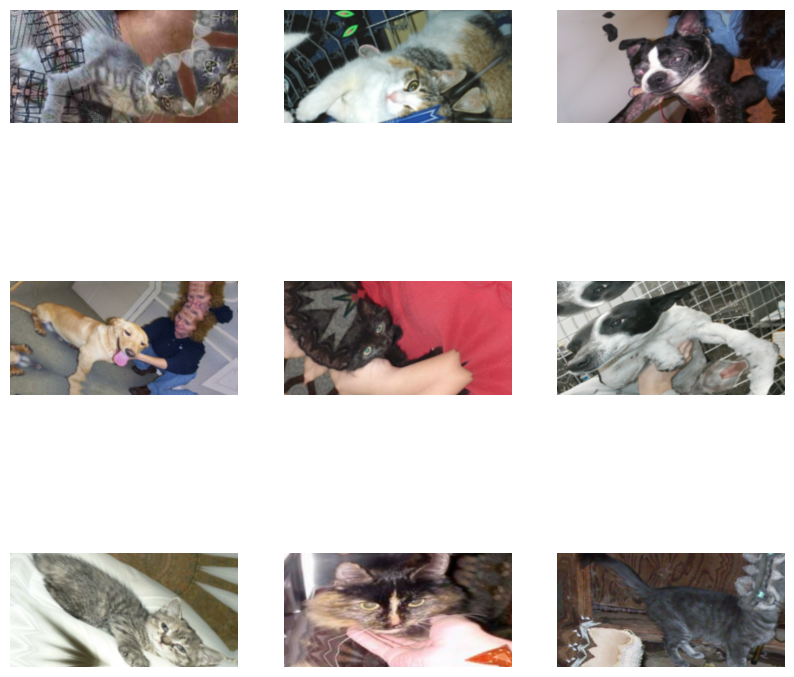

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_1.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

### CNN

In [29]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(128, 3, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Conv2D(256, 4, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(2, activation="softmax")(x)
model1 = keras.Model(inputs, outputs)

In [30]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 200, 400, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 100, 128)      3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 25, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 7, 256)         524544    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 2, 256)         0         
 g2D)                                                      

In [31]:
model1.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [32]:
model1.fit(train_ds_1, epochs=5, validation_data=test_ds_1)

Epoch 1/5
50/50 [==============================] - 22s 418ms/step - loss: 0.6982 - accuracy: 0.5562 - val_loss: 0.6657 - val_accuracy: 0.5525
Epoch 2/5
50/50 [==============================] - 21s 411ms/step - loss: 0.6688 - accuracy: 0.5913 - val_loss: 0.6458 - val_accuracy: 0.5850
Epoch 3/5
50/50 [==============================] - 21s 418ms/step - loss: 0.6852 - accuracy: 0.5519 - val_loss: 0.6815 - val_accuracy: 0.5100
Epoch 4/5
50/50 [==============================] - 21s 416ms/step - loss: 0.6817 - accuracy: 0.5663 - val_loss: 0.6499 - val_accuracy: 0.5700
Epoch 5/5
50/50 [==============================] - 21s 417ms/step - loss: 0.6680 - accuracy: 0.5681 - val_loss: 0.6659 - val_accuracy: 0.5550


In [33]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\data3\cats\4113.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 45ms/step
array([[0.54, 0.46]], dtype=float32)


In [34]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\data3\dogs\132.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 14ms/step
array([[0.45, 0.55]], dtype=float32)


### 3 classes: Аккордионы, гитары и дикие котики

In [35]:
train_ds_2, test_ds_2 = keras.utils.image_dataset_from_directory(
    r"C:\Users\Capybaras\Desktop\datapack",
    validation_split=0.15, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 164 files belonging to 3 classes.
Using 140 files for training.
Using 24 files for validation.


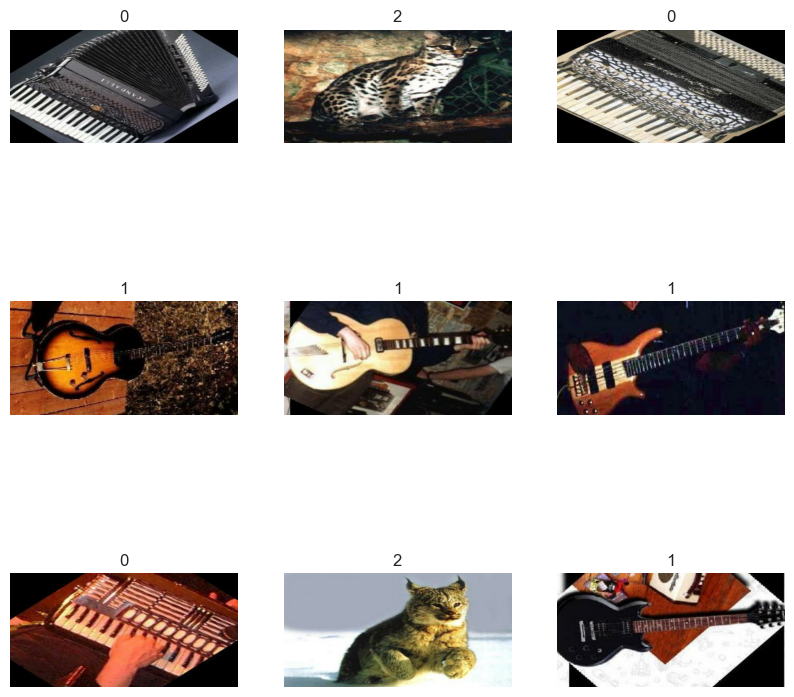

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [37]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [38]:
for i in range(4):
    train_ds_2 = train_ds_2.map(
        lambda img, label: (data_augmentation(img), label)
    )

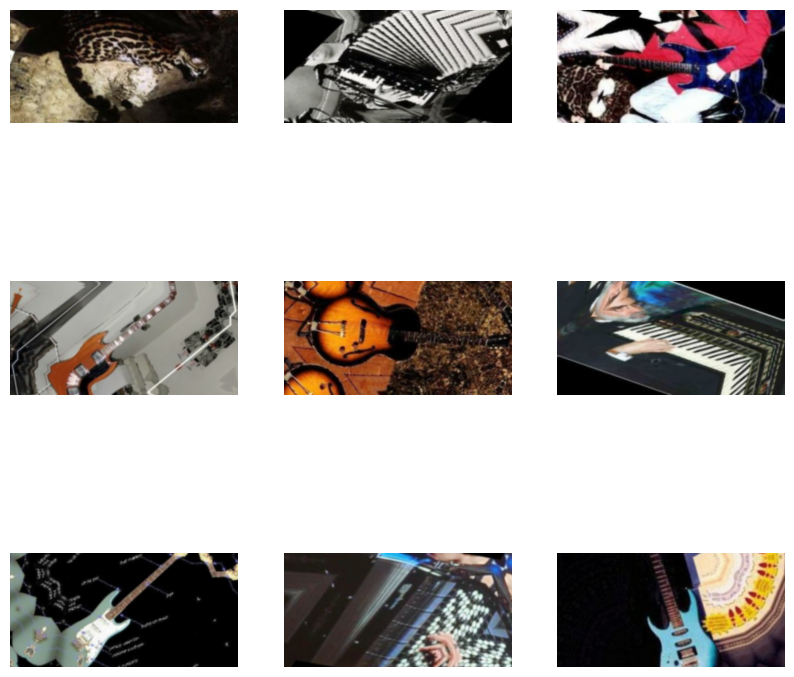

In [39]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_2.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [40]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(64, 3, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(128, 4, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)

In [41]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 200, 400, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 67, 134, 64)       1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 15, 128)        131200    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 5, 128)         0         
 g2D)                                                      

In [42]:
model2.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [43]:
model2.fit(train_ds_2, epochs=25, validation_data=test_ds_2)

Epoch 1/25
5/5 [==============================] - 3s 465ms/step - loss: 1.0558 - accuracy: 0.4286 - val_loss: 0.8437 - val_accuracy: 0.7083
Epoch 2/25
5/5 [==============================] - 2s 454ms/step - loss: 1.0129 - accuracy: 0.4714 - val_loss: 0.7524 - val_accuracy: 0.7500
Epoch 3/25
5/5 [==============================] - 2s 455ms/step - loss: 0.9503 - accuracy: 0.5571 - val_loss: 0.8214 - val_accuracy: 0.7083
Epoch 4/25
5/5 [==============================] - 2s 462ms/step - loss: 0.9285 - accuracy: 0.5357 - val_loss: 0.6169 - val_accuracy: 0.7917
Epoch 5/25
5/5 [==============================] - 2s 456ms/step - loss: 0.8940 - accuracy: 0.6143 - val_loss: 0.7773 - val_accuracy: 0.6667
Epoch 6/25
5/5 [==============================] - 3s 484ms/step - loss: 0.8350 - accuracy: 0.6143 - val_loss: 0.6002 - val_accuracy: 0.7917
Epoch 7/25
5/5 [==============================] - 2s 444ms/step - loss: 0.8154 - accuracy: 0.6286 - val_loss: 0.8440 - val_accuracy: 0.4167
Epoch 8/25
5/5 [====

In [44]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\accordion\image_0037.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)

print(np.around(predictions, 3))

1/1 [==============================] - 0s 48ms/step
array([[0.999, 0.   , 0.   ]], dtype=float32)


In [45]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\wild_cat\image_0012.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 16ms/step
array([[0.136, 0.008, 0.857]], dtype=float32)


In [46]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\electric_guitar\image_0045.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 14ms/step
array([[0.023, 0.891, 0.086]], dtype=float32)


In [47]:
model2.save("./models/lab5/model_3_classes_leopard_kangaroo_llama")

INFO:tensorflow:Assets written to: ../models/lab5/model_3_classes_leopard_kangaroo_llama\assets


INFO:tensorflow:Assets written to: ../models/lab5/model_3_classes_leopard_kangaroo_llama\assets
